In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [71]:
house = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [72]:
house.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [73]:
# no null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [74]:
house.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [75]:
# checking for null values
house[house.isnull().any(axis=1)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


<function matplotlib.pyplot.show(close=None, block=None)>

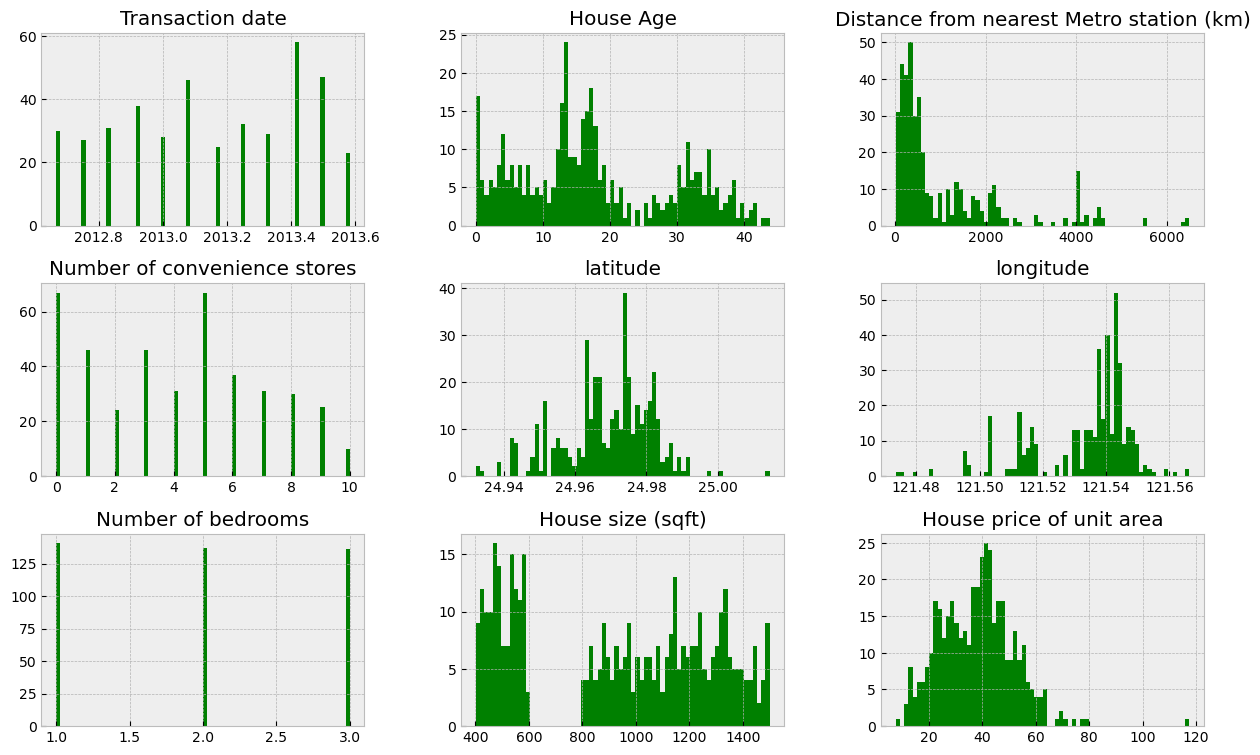

In [76]:
house.hist(bins=70, figsize=(15,9), color='green')
plt.show

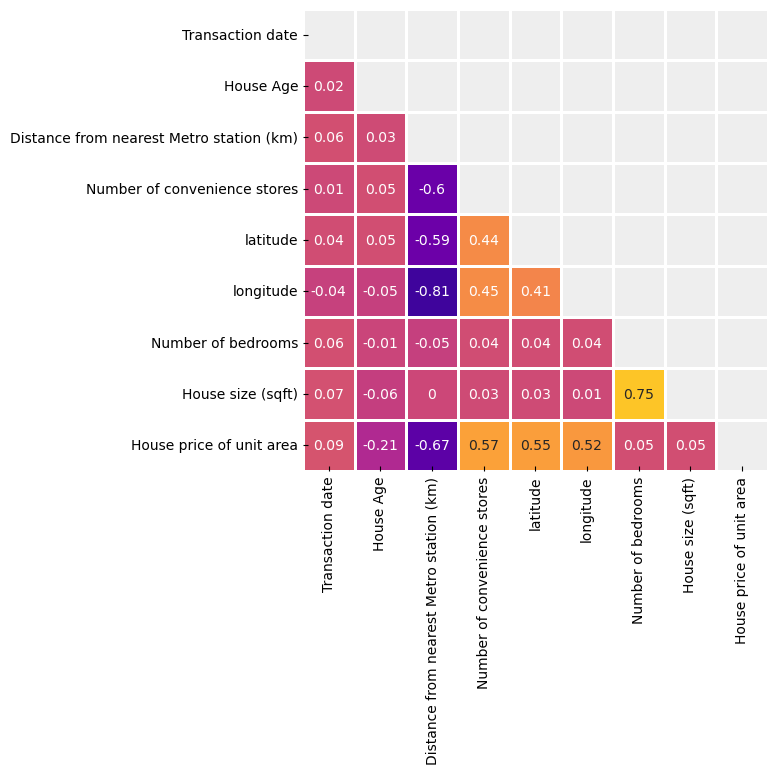

In [77]:
def corrMat(house, id=False):
    corr_mat = house.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0,\
        cmap='plasma', square=False, lw=1, annot=True, cbar=False)
plt.show()
corrMat(house)

<AxesSubplot:xlabel='House price of unit area'>

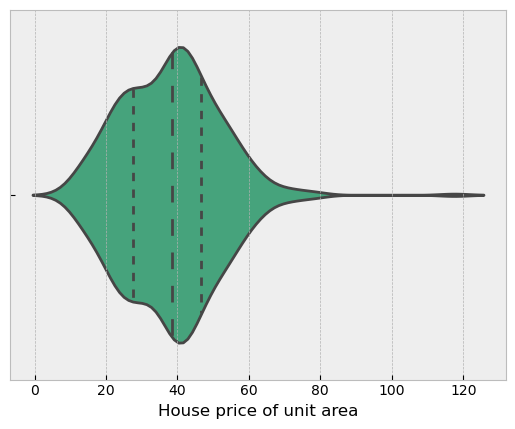

In [78]:
sns.violinplot(x=house['House price of unit area'], inner="quartile", \
    color="#36B37E")

/Users/vaibhavk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House price of unit area'>

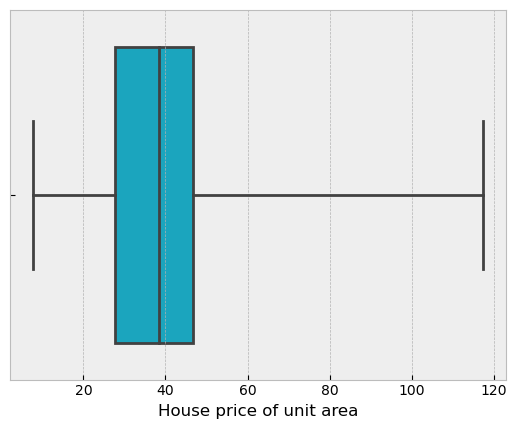

In [79]:
sns.boxplot(house['House price of unit area'], whis=10, color='#00B8D9')

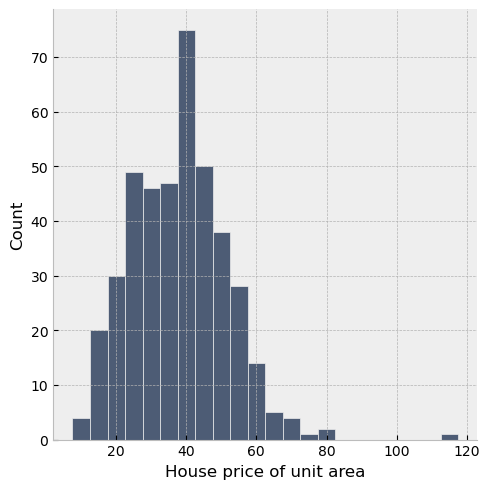

In [80]:
sns.displot(house['House price of unit area'], kde=False, color='#172B4D',\
)
# plt.xlabel('sales')

In [81]:
house.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

Text(0, 0.5, 'price')

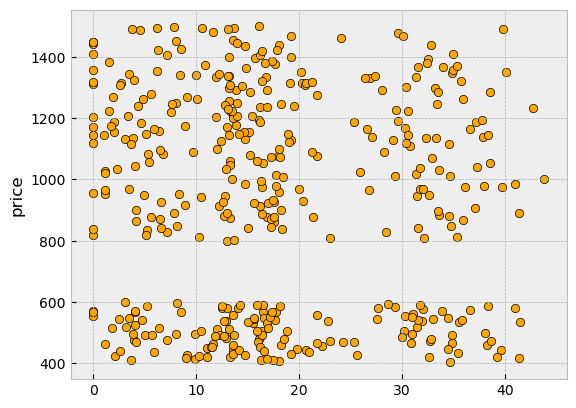

In [82]:
plt.scatter(x=house['House Age'], y=house['House size (sqft)'],\
    color='orange', edgecolors='#000000', linewidths=0.5)
plt.ylabel("price")

<AxesSubplot:>

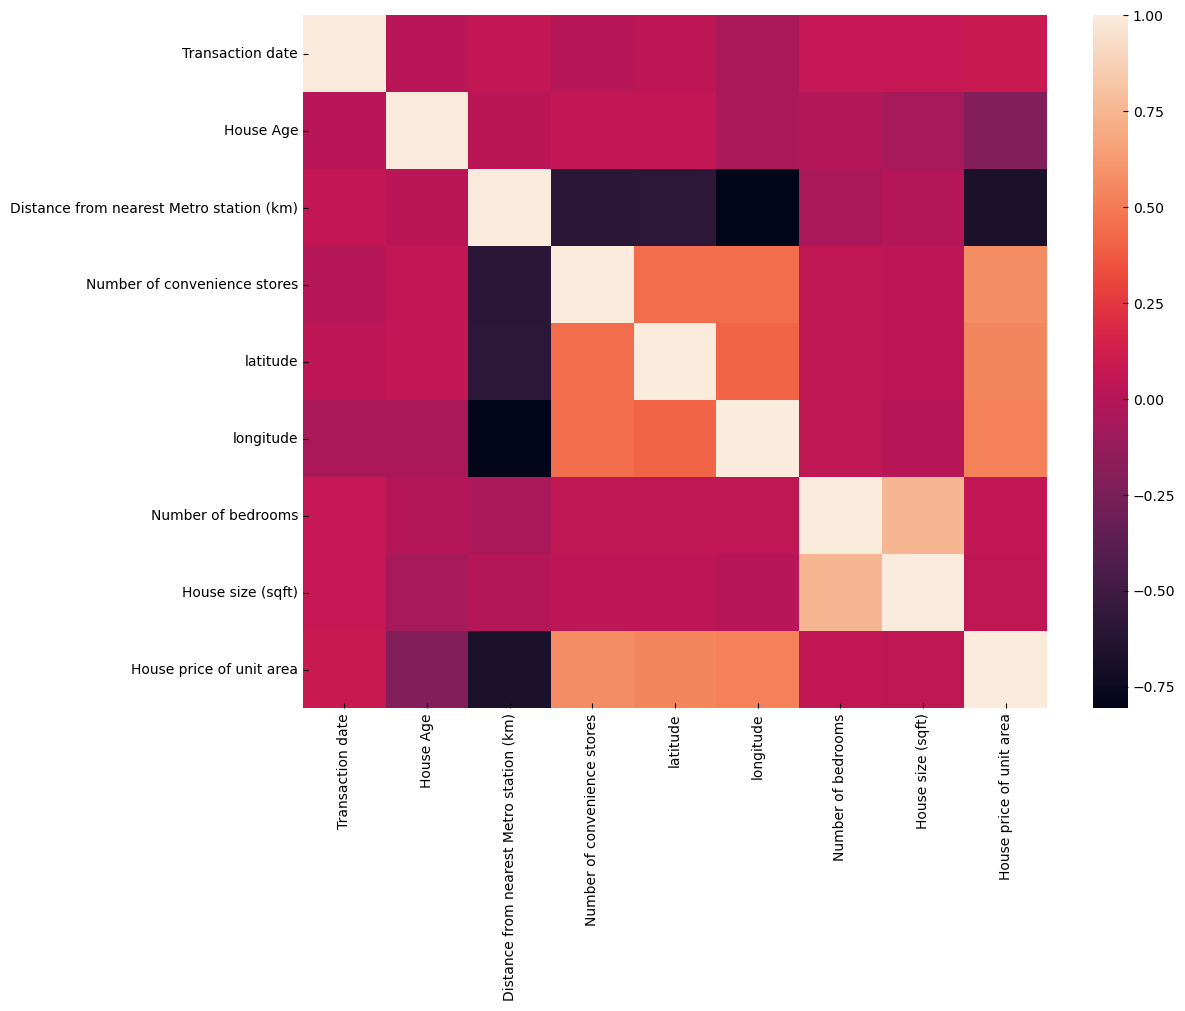

In [83]:
fig, ax=plt.subplots(figsize=(12,9))
sns.heatmap(house.corr(), ax=ax)

Text(13.819444444444445, 0.5, 'Count')

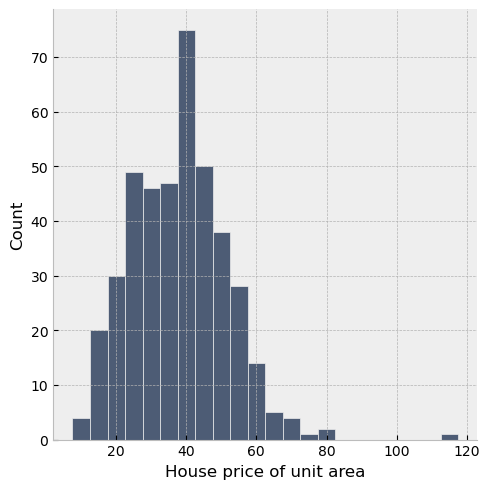

In [84]:
sns.displot(house['House price of unit area'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

Text(13.819444444444445, 0.5, 'Count')

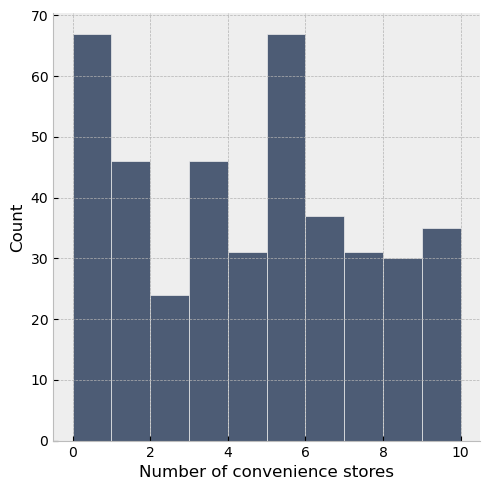

In [85]:
sns.displot(house['Number of convenience stores'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

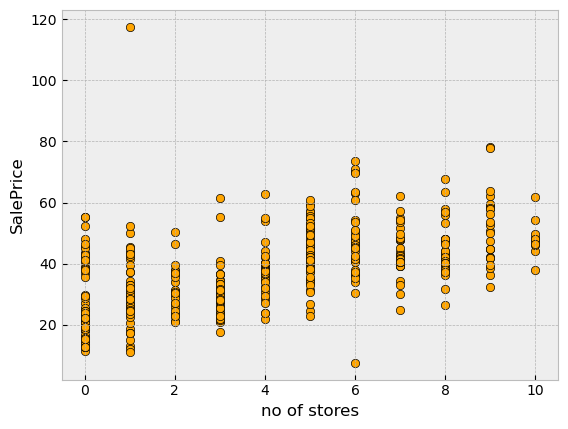

In [86]:
plt.scatter(x=house['Number of convenience stores'], y=house\
    ['House price of unit area'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("no of stores"); plt.ylabel("SalePrice");

Text(4.944444444444445, 0.5, 'Count')

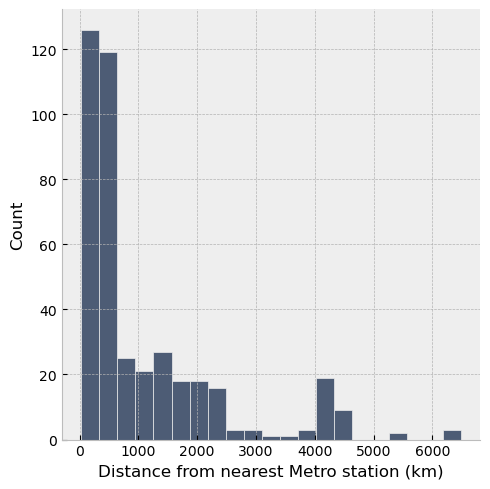

In [87]:
sns.displot(house['Distance from nearest Metro station (km)'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

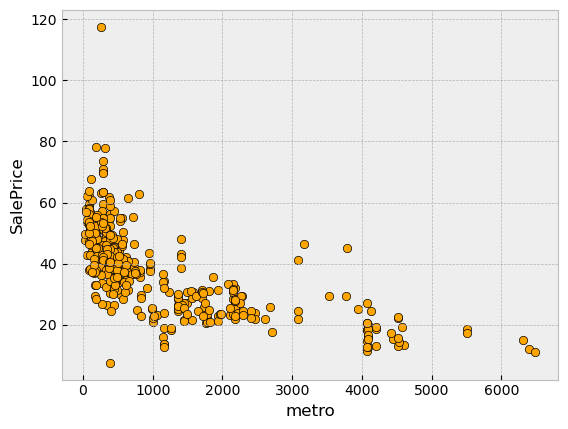

In [88]:
plt.scatter(x=house['Distance from nearest Metro station (km)'], \
    y=house['House price of unit area'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("metro"); plt.ylabel("SalePrice");

Text(4.944444444444445, 0.5, 'Count')

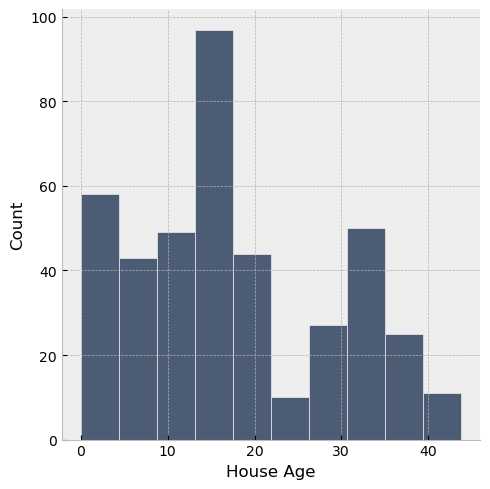

In [89]:
sns.displot(house['House Age'], kde=False, 
             color="#172B4D")
plt.ylabel("Count")

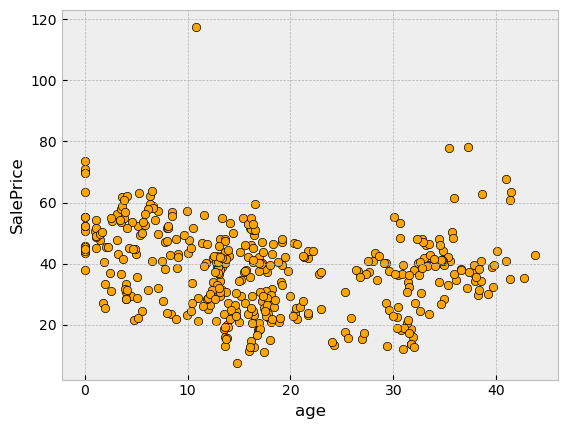

In [90]:
plt.scatter(x=house['House Age'], y=house['House price of unit area'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("age"); plt.ylabel("SalePrice");

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house.drop\
    (['House price of unit area','Transaction date'],axis=1), house[[\
        'House price of unit area']], test_size=0.3, random_state=48)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train.loc[:, X_train.columns] =scaler.fit_transform(X_train.loc[:, \
    X_train.columns])


In [93]:
X_train.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
87,-0.039851,2.275543,-1.335286,-2.063851,-1.882781,1.215452,-0.173766
318,-0.912077,-0.597876,2.085793,1.136994,0.278281,1.215452,1.379681
288,-0.066552,-0.641414,0.717361,0.739855,0.605599,-1.258250,-1.462921
38,-1.268087,-0.443253,0.717361,0.233543,0.884894,-1.258250,-0.993070
56,1.446493,-0.604350,1.401577,0.275472,0.465952,1.215452,-0.159083


In [94]:
X_test.loc[:, X_test.columns] = scaler.transform(X_test.loc[:,X_test.\
    columns])

In [95]:
X_test.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
269,0.022451,-0.240813,-1.335286,-0.452353,0.913329,-1.258250,-1.163391
221,-0.742972,0.198958,-1.335286,1.315786,-0.354873,-1.258250,-1.527526
408,0.102553,0.801949,-0.308963,-0.455517,-1.313449,-1.258250,-1.351331
147,-1.259187,-0.511896,1.401577,0.087978,0.740824,-1.258250,-1.230932
306,-0.262358,-0.761206,-0.993178,0.366450,-0.216489,1.215452,1.080151


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    'alpha' : [1, 10, 100, 290, 500],
    'fit_intercept' : [True, False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [97]:
clf= GridSearchCV(Ridge(random_state=48), parameter_space, n_jobs=4, cv=3, \
    scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(random_state=48), n_jobs=4,
             param_grid={'alpha': [1, 10, 100, 290, 500],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_absolute_error')

In [98]:
clf.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [99]:
ridge_model = Ridge(random_state=48, **clf.best_params_)

In [100]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, random_state=48, solver='sparse_cg')

In [101]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)

In [102]:
ridge_mae

5.811090250408258

In [104]:
# coordinates on map
import folium
def get_center_latlong(house):
    centerlat = (house['latitude'].max() + house['latitude'].min())/2
    centerlong = (house['longitude'].max() + house['longitude'].min())/2
    return centerlat, centerlong
center = get_center_latlong(house)
m = folium.Map(location=center, zoom_start=20)
m.save('circle_map.html')

center = get_center_latlong(house)
m = folium.Map(location=center, zoom_start=13)

for i in range(len(house)):
    folium.Marker(
        location=[house.iloc[i]['latitude'], house.iloc[i]['longitude']],
        radius=10
    ).add_to(m)
m.save('circle_map.html')
import branca.colormap as cm

# create a LinearColorMap and assign colors, vmin, and vmax
# the colormap will show green for $100,000 homes all the way up to red for $1,500,000 homes
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=7, vmax=117)

# create our map again.  This time I am using a different tileset for a new look
m = folium.Map(location=center, zoom_start=13, tiles='Stamen Toner')

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(house)):
    folium.Circle(
        location=[house.iloc[i]['latitude'], house.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(house.iloc[i]['House price of unit area']),
        fill_opacity=0.2
    ).add_to(m)

# the following line adds the scale directly to our map
m.add_child(colormap)

# Save map 
m.save('price_colormap.html')